# Tecnicas de Tratamento de Atributos

In [87]:
import pandas as pd
import numpy as np
base = pd.read_csv('../Dados/Bases_de_Dados/census.csv')
base

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [88]:
# Visualizacao das colunas a serem trabalhadas
colunas = base.columns[: -1] # Para selecionar todas as colunas excepto a ultima
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [89]:
# Divisao entre previsores e classe
X = base.iloc[:, 0:14].values
y = base.iloc[:, 14].values

In [90]:
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [91]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [92]:
# CONVERTER OS VALORES CATEGORICOS EM NUMERICOS
from sklearn.preprocessing import LabelEncoder

In [93]:
# CRIACAO DE VARIAVEIS PARA CADA ATRIBUTO
workclass = LabelEncoder()
education = LabelEncoder()
marital_status = LabelEncoder()
occupation = LabelEncoder()
relationship = LabelEncoder()
race = LabelEncoder()
sex = LabelEncoder()
native_country = LabelEncoder()

In [94]:
X[:, 1] = workclass.fit_transform(X[:, 1])
X[:, 3] = education.fit_transform(X[:, 3])
X[:, 5] = marital_status.fit_transform(X[:, 5])
X[:, 6] = occupation.fit_transform(X[:, 6])
X[:, 7] = relationship.fit_transform(X[:, 7])
X[:, 8] = race.fit_transform(X[:, 8])
X[:, 9] = sex.fit_transform(X[:, 9])
X[:, 13] = native_country.fit_transform(X[:, 13])

In [95]:
X

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [96]:
#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [97]:
X_scaler = Scaler.fit_transform(X)
X_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

# TECNICA DE REDUCAO DE DIMENSIONALIDADE POR VARIANCIA

In [98]:
# VISUALIZACAO DA VARIANCIA DOS VALORES REAIS E DOS ESCALONADOS
np.sqrt(X[:, 0].var()), (X_scaler[:, 0].var())


(13.640223092304081, 0.034913808595952486)

In [99]:
for i in range(X.shape[1]):
    print(X_scaler[:, i].var())

0.034913808595952486
0.03312115190663569
0.005138537590667898
0.06657103564450892
0.029416385024073417
0.06301761677301636
0.09123816653931152
0.10326534394406342
0.04502805169292987
0.22136950173699113
0.00545419549240862
0.008557270623428908
0.015874043397822807
0.03641266114220053


In [100]:
# SELECIONAR UM DOS MENORES VALORES PARA UTILIZAR COMO PARAMETRO DA VARIANCIA
from sklearn.feature_selection import VarianceThreshold
selecao = VarianceThreshold(threshold = 0.05)
selecao

VarianceThreshold(threshold=0.05)

In [101]:
# TREINAMENTO PARA SELECAO DA COLUNA
X_variance = selecao.fit_transform(X_scaler)
X_variance.shape

(32561, 5)

In [102]:
# VISUALIZAR OS VALORES DA VARIANCIA
selecao.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

In [103]:
# VERIFICAR OS INDICES DOS ATRIBUTOS SELECIONADOS
indices = np.where(selecao.variances_ > 0.05)
indices

(array([3, 5, 6, 7, 9], dtype=int64),)

In [104]:
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [105]:
# ELIMINAR AS COLUNAS NAO SELECIONADAS PARA PREPROCESSAR APENAS AS COLUNAS SELECIONADAS
X_variance = base.drop(columns=['age', 'workclass', 'final-weight', 'education-num','race', 
                                'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'])
X_variance.shape

(32561, 6)

In [106]:
X_variance

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K
...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,Male,<=50K


In [107]:
X_var = X_variance.iloc[:, 0:5].values
y_var = X_variance.iloc[:, 5].values

In [108]:
X_var

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' Female']], dtype=object)

In [109]:
y_var

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
education = LabelEncoder()
marital_status = LabelEncoder()
occupation = LabelEncoder()
relationship = LabelEncoder()
sex = LabelEncoder()

In [112]:
X_var [:, 0] = education.fit_transform(X_var[:, 0])
X_var [:, 1] = marital_status.fit_transform(X_var[:, 1])
X_var [:, 2] = occupation.fit_transform(X_var[:, 2])
X_var [:, 3] = relationship.fit_transform(X_var[:, 3])
X_var [:, 4] = sex.fit_transform(X_var[:, 4])

In [113]:
X_var

array([[9, 4, 1, 1, 1],
       [9, 2, 4, 0, 1],
       [11, 0, 6, 1, 1],
       ...,
       [11, 6, 1, 4, 0],
       [11, 4, 1, 3, 1],
       [11, 2, 4, 5, 0]], dtype=object)

In [114]:
# APLICACAO DO ONEHOTENCODER
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(transformers = [("OneHote", OneHotEncoder(), [0, 1, 2, 3, 4])], remainder = 'passthrough')
X_var = onehotencoder.fit_transform(X_var).toarray()
X_var

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [115]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [116]:
X_v = Scaler.fit_transform(X_var)
X_v

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_v, y_var, test_size = 0.3, random_state = 0 )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 46), (9769, 46), (22792,), (9769,))

In [118]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
Dt.score(X_test, y_test)

0.8195311700276384

In [119]:
predit = Dt.predict(X_test)
predit

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predit))

              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.89      7407
        >50K       0.67      0.50      0.57      2362

    accuracy                           0.82      9769
   macro avg       0.76      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



0.8195311700276384

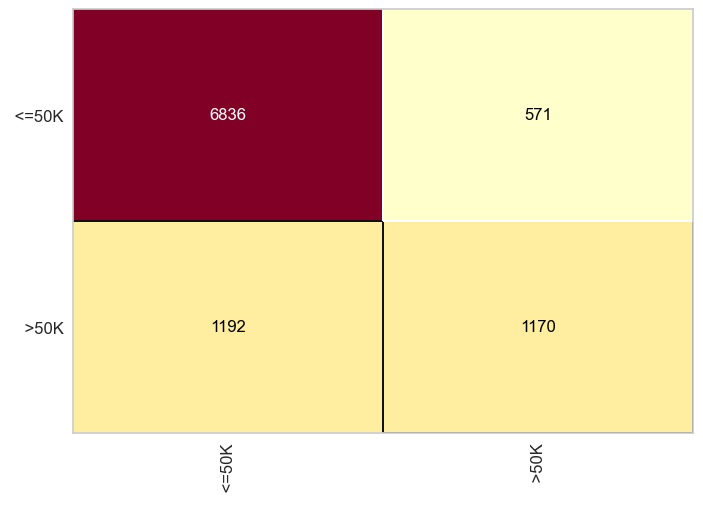

In [121]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(Dt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# EXTRA TREE
* Um algoritmo para selecao de atributos e pode ser utilizado para classificacao taambem

In [122]:
# Importacao do algoritmo
from sklearn.ensemble import ExtraTreesClassifier

In [123]:
X_scaler.shape

(32561, 14)

In [124]:
# CRIACAO DO CLASSIFICADOR OU SELECTOR
seletor = ExtraTreesClassifier().fit(X_scaler, y)
seletor

ExtraTreesClassifier()

In [125]:
#VISUALIZACAO DE ATRIBUTOS IMPORTANTES #### O ATRIBUTO COM MAIOR VALOR EH O MAIS IMPORTANTE EX: 016428802
importances = seletor.feature_importances_
importances

array([0.15509508, 0.04456627, 0.1639536 , 0.03664982, 0.08961365,
       0.06968441, 0.07521149, 0.09384527, 0.01479018, 0.02968195,
       0.08537637, 0.02783627, 0.09629191, 0.01740373])

In [126]:
colunas # LOCALIZACAO DOS ATRIBUTOS IMPORTANTES NAS COLUNAS

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [127]:
importances.sum() # SOMA DOS ATRIBUTOS IMPORTANTES

1.0

In [128]:
# INDEXACAO DOS ATRIBUTOS MAIS IMPORTANTES
indices = []
for i in range(len(importances)):
    #print(i)
    if importances[i] >= 0.029: # Intervalo dos atributos a serem selecionados
        indices.append(i)
indices # INDICES DOS ATRIBUTOS SELECIONADOS 

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12]

In [129]:
#visualizacao dos atributos selecionados
colunas[indices]

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'hour-per-week'],
      dtype='object')

In [149]:
indices

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12]

In [168]:
#CRIACAO DUM DATASET APENAS COM ATRIBUTOS SELECIONADOS no formato array atravez da funcao VALUES
X_extraTree = base.iloc[:,indices].values
X_extraTree

array([[39, ' State-gov', 77516, ..., ' Male', 2174, 40],
       [50, ' Self-emp-not-inc', 83311, ..., ' Male', 0, 13],
       [38, ' Private', 215646, ..., ' Male', 0, 40],
       ...,
       [58, ' Private', 151910, ..., ' Female', 0, 40],
       [22, ' Private', 201490, ..., ' Male', 0, 20],
       [52, ' Self-emp-inc', 287927, ..., ' Female', 15024, 40]],
      dtype=object)

In [169]:
from sklearn.preprocessing import LabelEncoder
workclass = LabelEncoder()
education = LabelEncoder()
marital_status = LabelEncoder()
occupation = LabelEncoder()
relationship = LabelEncoder()
sex = LabelEncoder()

In [170]:
X_extraTree[:, 1] = workclass.fit_transform(X_extraTree[:, 1])
X_extraTree[:, 3] = education.fit_transform(X_extraTree[:, 3])
X_extraTree[:, 5] = marital_status.fit_transform(X_extraTree[:, 5])
X_extraTree[:, 6] = occupation.fit_transform(X_extraTree[:, 6])
X_extraTree[:, 7] = relationship.fit_transform(X_extraTree[:, 7])
X_extraTree[:, 8] = sex.fit_transform(X_extraTree[:, 8])

In [171]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
OneHotEncoder = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7])], remainder='passthrough')
X_extraTree = OneHotEncoder.fit_transform(X_extraTree).toarray()
X_extraTree

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.1740e+03,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.5024e+04,
        4.0000e+01]])

In [176]:
Xe = X_extraTree
Xe.shape

(32561, 59)

In [178]:
from sklearn.model_selection import train_test_split
X_trn, X_teste, y_trn, y_teste = train_test_split(Xe, y, test_size = 0.3, random_state=0)

In [180]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(X_trn, y_trn)
Rf.score(X_teste, y_teste)

0.8453270549698024

In [181]:
prever = Rf.predict(X_teste)
prever

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [187]:
from sklearn.metrics import classification_report
print(classification_report(prever, y_teste))

              precision    recall  f1-score   support

       <=50K       0.92      0.88      0.90      7744
        >50K       0.61      0.71      0.66      2025

    accuracy                           0.85      9769
   macro avg       0.76      0.80      0.78      9769
weighted avg       0.86      0.85      0.85      9769



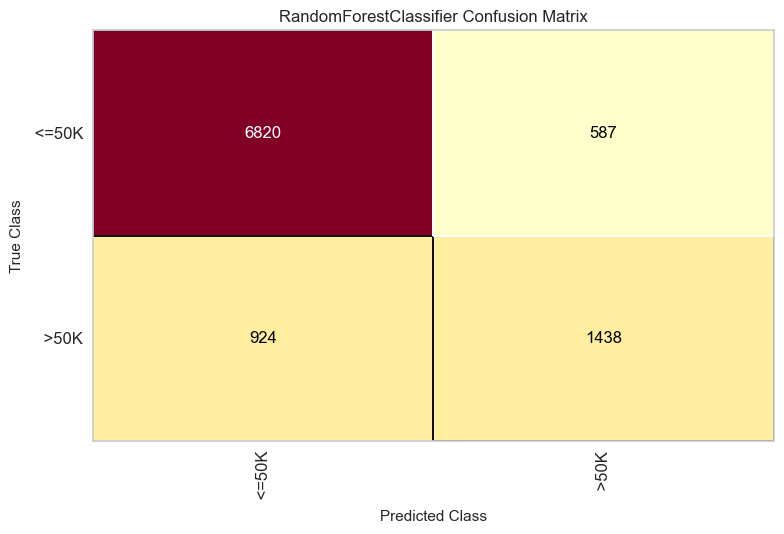

In [191]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(Rf)
cm.fit(X_trn, y_trn)
cm.score(X_teste, y_teste)
cm.show();

# Conclusao: a reducao de atributos traz bom desempenho quando aplicado a dados com muitos atributos ou colunas